# 2D PCA  for title clusters

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
# local
import set_path
import supp.support_load as lp
import supp.support_get_mapping as gm

In [2]:
folder = r'data/'
file_name = 'person_title_cluster_pivot_v2.csv'

In [3]:
folder_save = 'img/plots_PCA_of_titles/'
# Check if 'img' directory exists, if not, create it
if not os.path.exists(folder_save.split('/')[0]):
    os.makedirs(folder_save.split('/')[0])
# Check if 'plots' directory exists within 'img', if not, create it
if not os.path.exists(folder_save[:-1]):
    os.makedirs(folder_save[:-1])

In [5]:
data = lp.read_csv(file_name, folder=folder, index_col='ID_person')
print(f'{data.shape}')
data.head()

CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\person_title_cluster_pivot_v2.csv
(3977, 8)


,administration,epithet,family,none,priest,privy,rank,worker
ID_person,,,,,,,,
1,16,12,4,20,24,11,7,6
2,0,3,4,4,3,0,2,0
4,8,4,0,7,3,0,2,0
5,6,4,0,4,0,0,2,0
6,1,4,5,11,3,0,0,1


In [5]:
data.describe()

,administration,epithet,family,priest,privy,rank,worker
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.528370,0.411888,0.316722,0.564395,0.160612,0.475233,0.121585
std,1.292397,0.857556,0.465268,0.783642,0.562884,0.692453,0.346479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,13.000000,6.000000,1.000000,8.000000,6.000000,5.000000,3.000000


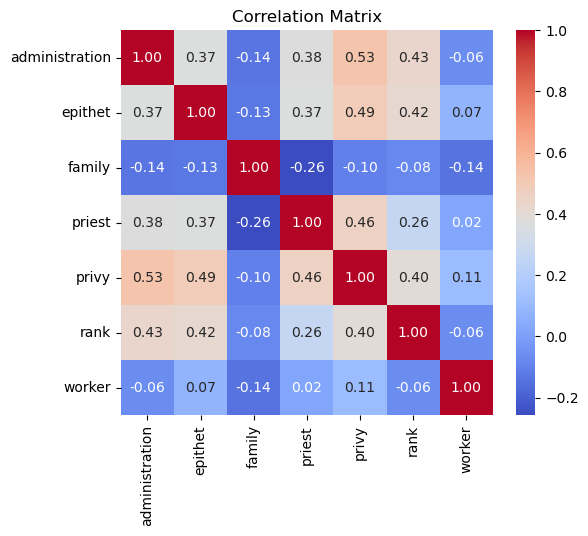

In [6]:
# Assuming your DataFrame is named df
correlation_matrix = data.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

PCA

In [7]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)
# Fit PCA to your data
pca.fit(data)
# Transform the data into the new 2-dimensional space
X_2d = pca.transform(data)
 # Convert the transformed data into a DataFrame
X_2d = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])

In [8]:
# Plot the 2D scatterplot
def scatter(cluster, figsize=(6, 5), size_scat = None, size_leg=8):
    # sort array
    cluster_data = np.array(data[cluster])
    idx_sorted = cluster_data.argsort()
    cluster_data = cluster_data[idx_sorted]
    X = X_2d.iloc[idx_sorted, :]
    n_max = np.max(cluster_data) + 1
    # colors
    tab20c = np.array(plt.get_cmap('tab20c').colors)
    palette = tab20c
    if n_max <= 5:
        palette = palette[::4]
    elif n_max <=10:
        palette = [c for id, c in enumerate(palette) if id % 4 == 1 or id % 4 == 0]
        palette = np.array(palette)
    colors = palette[cluster_data]
    # plots
    plt.figure(figsize=figsize)
    # Setting font sizes globally
    plt.rcParams.update({'font.size': 12})  # Set the font size globally
    if size_scat is not None:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99, s=size_scat)
    else:
        plt.scatter(X['PC1'], X['PC2'], c=colors, alpha=.99)
    #plt.title(f'2D PCA of title clusters\nColored by {cluster}')
    #plt.title(f'Colored by {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    # Create custom legend
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=palette[i],
                          markersize=size_leg, label=str(i)) for i in range(0, n_max)]
    plt.legend(handles=handles, title="n. of titles", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig(folder_save + f'PCA_title_{cluster}_v2.png',  dpi=600)
    plt.savefig(folder_save + f'PCA_title_{cluster}_v2.pdf')
    plt.show()

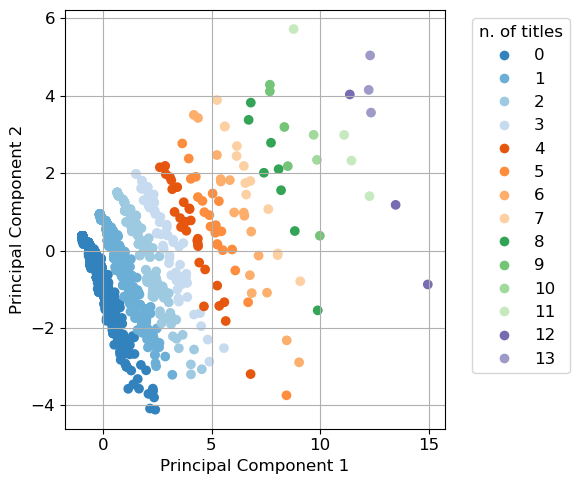

In [9]:
# Plot the 2D scatterplot
cluster = 'administration'
scatter(cluster)

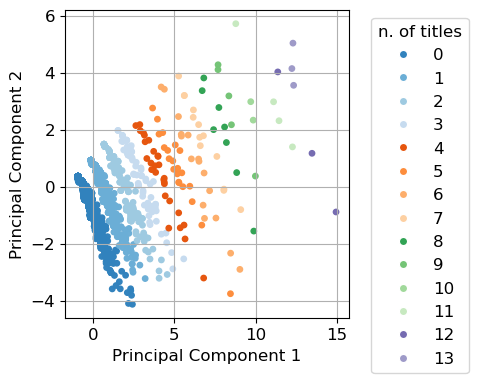

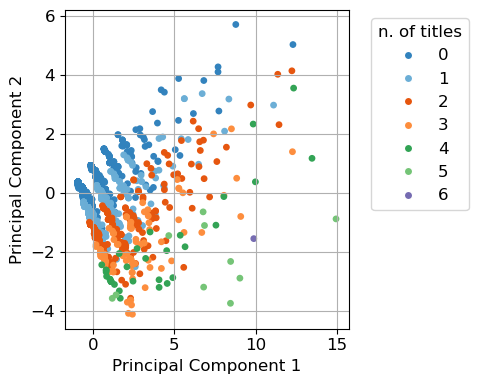

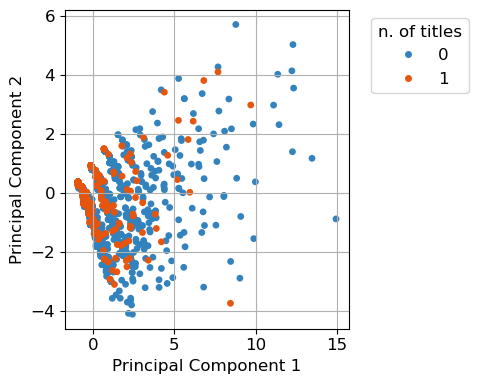

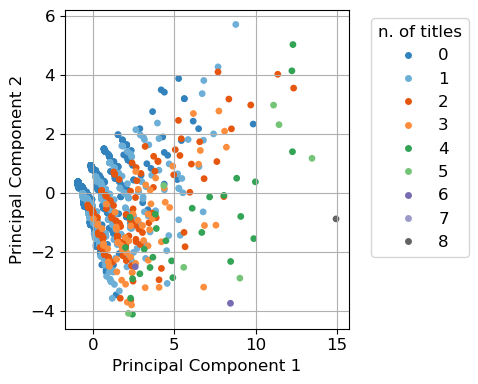

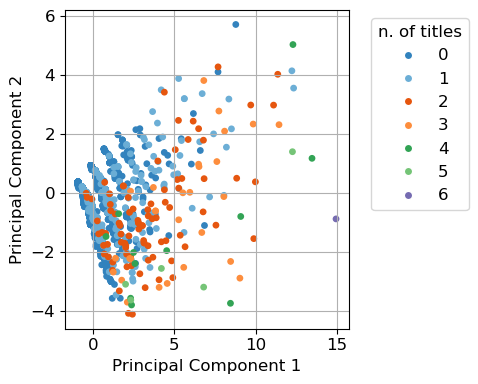

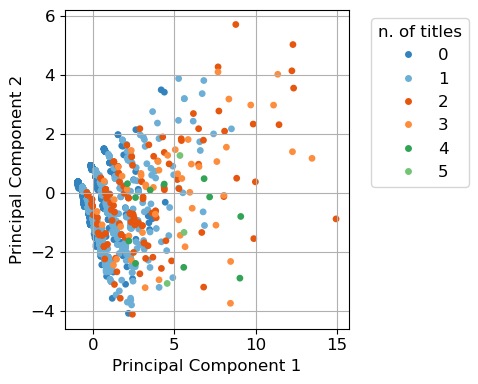

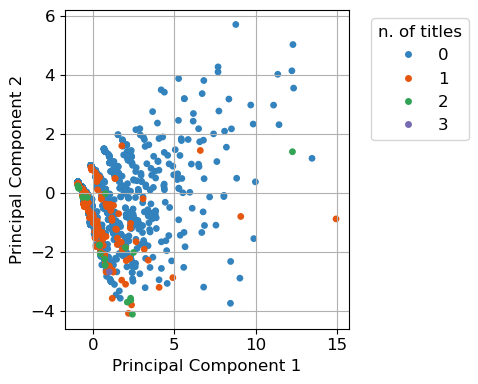

Finished.


In [10]:
for id, cluster in enumerate(data.columns):
    scatter(cluster, figsize=(5, 4), size_scat = 15, size_leg=6)

print('Finished.')

In [11]:
data.columns

Index(['administration', 'epithet', 'family', 'priest', 'privy', 'rank',
       'worker'],
      dtype='object')

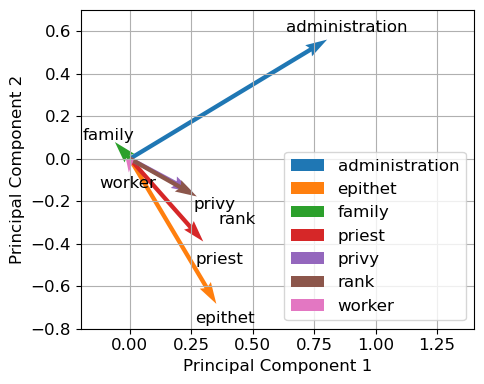

In [12]:
# Plot arrows representing original features in PCA space
plt.figure(figsize=(5, 4))
# Setting font sizes globally
#plt.rcParams.update({'font.size': 12})  # Set the font size globally

# Scaling factor for the arrows (to make them visible)
arrow_size = 1
colors = plt.cm.tab10.colors

size = {
    'administration': 1.1,
    'epithet': 1.1,
    'family': 1.4,
    'priest': 1.22,
    'privy': 1.35, 
    'rank': 1.6,
    'worker': 1.8
}

# Plot arrows and feature names
for i, v in enumerate(pca.components_.T):
    cluster = data.columns[i]
    plt.quiver(0, 0, v[0] * arrow_size, v[1] * arrow_size, angles='xy', scale_units='xy', scale=1, color=colors[i],
               alpha=1, label=cluster, width=0.011 )
    #plt.arrow(0, 0, v[0] * arrow_size, v[1] * arrow_size, color=colors[i], alpha=0.5)
    plt.text(v[0] * arrow_size * size[cluster], v[1] * arrow_size * size[cluster], data.columns[i], color='black', ha='center', va='center')
# Set the limits for x and y axes
plt.xlim(-.2, 1.4)
plt.ylim(-.8, .7)
# Create custom legend
plt.legend(loc='lower right')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('Projection of Feature Vectors')
plt.grid()

plt.tight_layout()
plt.savefig(folder_save + f'PCA_title_feature_projection.png', dpi=600)
plt.savefig(folder_save + f'PCA_title_feature_projection.pdf')
plt.show()